In [ ]:
%pip install numpy
%pip install seaborn

In [23]:
import time
import subprocess
import resource
import pandas as pd
import seaborn as sns
from IPython.display import display

In [25]:
dimensions = [i for i in range(2, 9)]
points = [10**i for i in range(1, 6)]


runtime_data = []

for dimension in dimensions:
    print("Running dimension", dimension, "...")
    for p in points:
        print(f"... with {p} points")
        starttime = time.process_time()
        start_utime_before = resource.getrusage(resource.RUSAGE_CHILDREN).ru_utime

        process = subprocess.run(
            [f"rbox {p} D{dimension} | qhull", str(dimension)],
            stdout=subprocess.DEVNULL,
            shell=True,
        )

        end_utime_after = resource.getrusage(resource.RUSAGE_CHILDREN).ru_utime
        user_cpu_time = end_utime_after - start_utime_before


        runtime_data.append({'Dimension': dimension, 'Points': p, 'Runtime': user_cpu_time})

runtime = pd.DataFrame(runtime_data)

Running dimension 2 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 3 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 4 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 5 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 6 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 7 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 8 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points


Killed


In [26]:
display(runtime)

,Dimension,Points,Runtime
0,2,10,0.002362
1,2,100,0.002146
2,2,1000,0.002624
3,2,10000,0.014513
4,2,100000,0.082173
5,3,10,0.002038
6,3,100,0.001990
7,3,1000,0.002771
8,3,10000,0.012486
9,3,100000,0.115604


/tmp/ipykernel_70811/2436458000.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.get_figure().show()


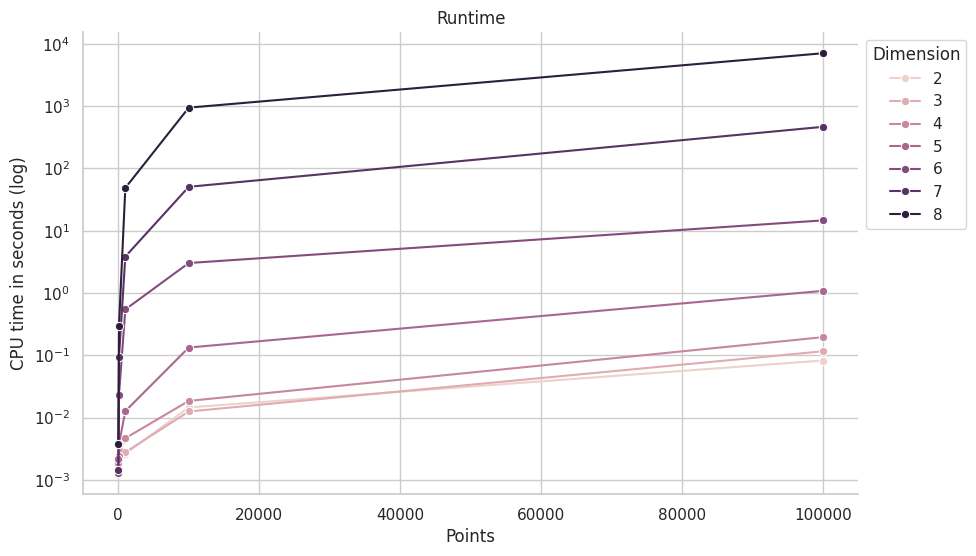

In [35]:
sns.set_theme(style="whitegrid", rc={"figure.figsize": (10, 6)})
plot = sns.lineplot(x='Points', y='Runtime', hue='Dimension', data=runtime, marker='o')
plot.set_title('Runtime')
plot.set_xlabel('Points')
plot.set_ylabel('CPU time in seconds (log)')
plot.set_yscale('log')

plot.legend(title='Dimension', loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
sns.despine()
plot.get_figure().show()
